In [58]:
def classificateWithNumbersThreeTarget(value):
    target=0
    if(value>=0.0015):
        target=1
    elif(value<=-0.0015):
        target=-1
    else:
        target=0
    return target




def graph(test_y,yhat,mennyiseg,oszlop):
    valos=test_y[:,oszlop-1][:mennyiseg]
    predikt=yhat[:,oszlop-1][:mennyiseg]
    valos = pd.DataFrame(valos, columns=['Real'])
    predikt = pd.DataFrame(predikt, columns=['Predicted'])
    merge=valos.join(predikt)
    
    plt.figure(figsize=(30,20))
    sns.lineplot(data=merge, linewidth=3)
    plt.show()
    
def graph1D(test_y,yhat,mennyiseg):
    valos=test_y[:mennyiseg]
    predikt=yhat[:mennyiseg]
    valos = pd.DataFrame(valos, columns=['Real'])
    predikt = pd.DataFrame(predikt, columns=['Predicted'])
    merge=valos.join(predikt)
    
    plt.figure(figsize=(30,20))
    sns.lineplot(data=merge, linewidth=3)
    plt.show()

def correlation_heatmap(df):
    correlations = df.corr()

    fig, ax = plt.subplots(figsize=(40,40))
    sns.heatmap(correlations, vmax=1.0, center=0, fmt='.2f',
                square=True, linewidths=.1, annot=True, cbar_kws={"shrink": .7})
    sns.set(font_scale=2)
    plt.show();
    
    
    
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def metrikak(y_true,y_pred):
    print(mean_squared_error(y_true,y_pred))
    print(mean_absolute_percentage_error(y_true,y_pred))
from numpy import hstack
import array
from numpy import array
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
import os
import warnings
warnings.filterwarnings('ignore')
print("Setup Complete")
from pandas_profiling import ProfileReport
from pandas_profiling.utils.cache import cache_file
import tensorflow as tf
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense

def percentChange(lastValue,secondLastValue):
        return round((float(lastValue)-secondLastValue)/abs(secondLastValue),6)


def kirajzoltatas(yhat,test_y):
    yhat = pd.DataFrame(yhat, columns=['Predicted'])
    test_y2 = pd.DataFrame(test_y, columns=['Real'])
    merge=test_y2.join(yhat)

    import seaborn as sns
    import matplotlib.pyplot as plt

    plt.figure(figsize=(30,20))
    sns.lineplot(data=merge[:100], linewidth=3)
    plt.show()

# split a univariate sequence into samples
def split_sequence(sequence, n_steps_in, n_steps_out):
    X, y = list(), list()
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps_in
        out_end_ix = end_ix + n_steps_out
        # check if we are beyond the sequence
        if out_end_ix > len(sequence):
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix:out_end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)



tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0,
    patience=0,
    verbose=0,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
)
    
#data1 = pd.read_csv('/home/balazs/Desktop/adathalmazok/btc_2012-2021/btc_split_data_part_06', sep=",", header=None)
#data1.columns = ["time", "open", "high", "low","close","volume",'drop1','drop2']

#data2 = pd.read_csv('/home/balazs/Desktop/adathalmazok/btc_2012-2021/btc_split_data_part_07', sep=",", header=None)
#data2.columns = ["time", "open", "high", "low","close","volume",'drop1','drop2']

#data3 = pd.read_csv('/home/balazs/Desktop/adathalmazok/btc_2012-2021/btc_split_data_part_08', sep=",", header=None)
#data3.columns = ["time", "open", "high", "low","close","volume",'drop1','drop2']

data4 = pd.read_csv('/home/balazs/Desktop/adathalmazok/btc_2012-2021/btc_split_data_part_09', sep=",", header=None)
data4.columns = ["time", "open", "high", "low","close","volume"]

#data= pd.concat([data1,data2,data3,data4], axis=0)
data=data4.dropna()
data=data[['time','open','high','low','close','volume']]
#data

#data=data4
    

Setup Complete


In [59]:
tenk=data.close.values[len(data)-10000:]

In [60]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
tenk=scaler.fit_transform(np.array(tenk).reshape(-1,1))

In [61]:
training_size=int(len(tenk)*0.65)
test_size=len(tenk)-training_size
train_data,test_data=values[0:training_size,:],values[training_size:len(tenk),:1]

In [62]:

import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [63]:

# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [65]:
y_train

array([0.98990147, 0.9910676 , 0.9910718 , ..., 0.87709364, 0.87794581,
       0.87799067])

In [46]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [47]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(10,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


In [16]:
print("tanitás előtt")

tanitás előtt


In [48]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=20,batch_size=64,verbose=1)

Epoch 1/20
102/102 [==============================] - 5s 22ms/step - loss: 0.0415 - val_loss: 4.3787e-04
Epoch 2/20
102/102 [==============================] - 2s 15ms/step - loss: 2.6274e-04 - val_loss: 2.8685e-04
Epoch 3/20
102/102 [==============================] - 2s 15ms/step - loss: 2.2893e-04 - val_loss: 2.0059e-04
Epoch 4/20
102/102 [==============================] - 2s 15ms/step - loss: 1.8960e-04 - val_loss: 3.8041e-04
Epoch 5/20
102/102 [==============================] - 2s 15ms/step - loss: 1.4864e-04 - val_loss: 1.4690e-04
Epoch 6/20
102/102 [==============================] - 2s 15ms/step - loss: 1.1156e-04 - val_loss: 1.2019e-04
Epoch 7/20
102/102 [==============================] - 2s 15ms/step - loss: 7.9953e-05 - val_loss: 7.6402e-05
Epoch 8/20
102/102 [==============================] - 2s 16ms/step - loss: 5.4556e-05 - val_loss: 5.2647e-05
Epoch 9/20
102/102 [==============================] - 2s 16ms/step - loss: 3.7460e-05 - val_loss: 2.5781e-05
Epoch 10/20
102/102 [==

In [49]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [50]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [67]:
y_test = y_test.reshape(-1, 1)

In [68]:
y_test

array([[0.87750992],
       [0.87779024],
       [0.87596535],
       ...,
       [0.94025117],
       [0.94381544],
       [0.946585  ]])

In [69]:
y_test=scaler.inverse_transform(y_test)

In [70]:
y_test

array([[58273.70945203],
       [58276.22258363],
       [58259.86209693],
       ...,
       [58836.19856591],
       [58868.15303416],
       [58892.98277433]])

In [80]:
len(y_test)-len(test_predict)

-90

In [78]:
def graph(test_y,yhat):
    valos=test_y[:,1-1]
    predikt=yhat[:,1-1]
    valos = pd.DataFrame(valos, columns=['Real'])
    predikt = pd.DataFrame(predikt, columns=['Predicted'])
    merge=valos.join(predikt)
    
    plt.figure(figsize=(30,20))
    sns.lineplot(data=merge, linewidth=3)
    plt.show()

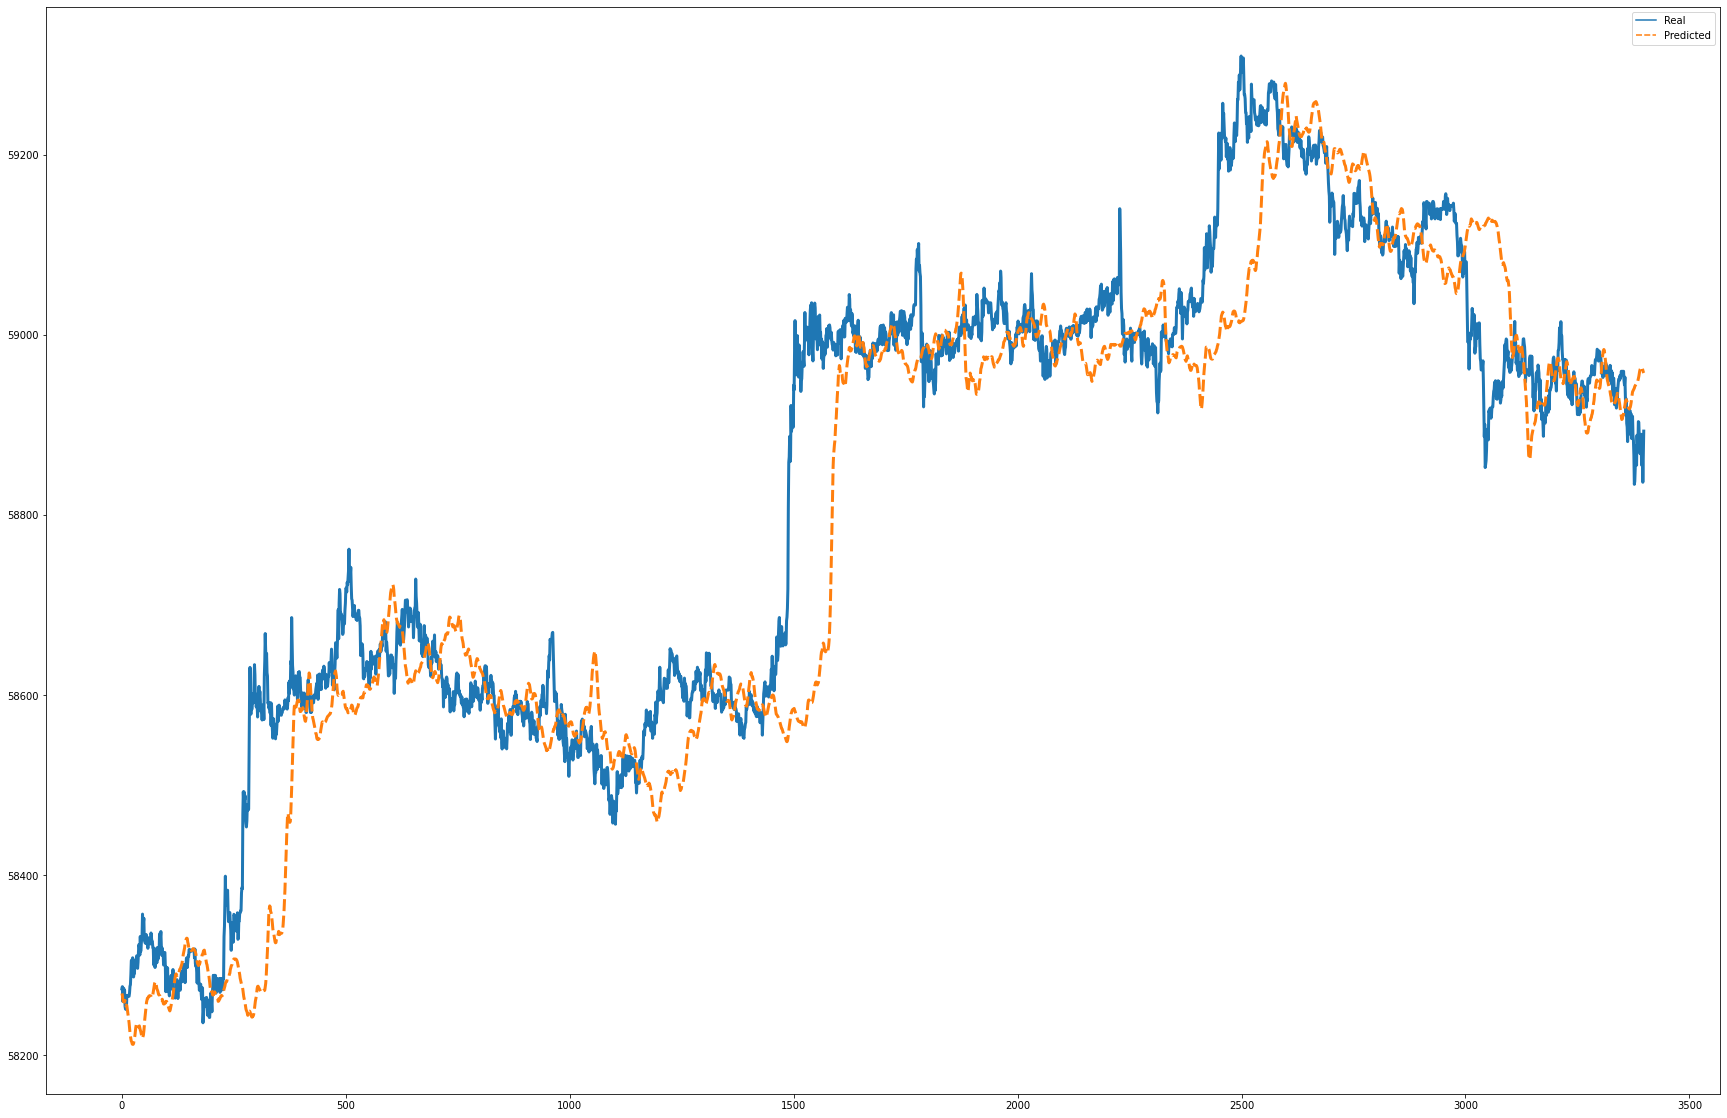

In [79]:
graph(y_test,test_predict)

In [43]:
import math
from sklearn.metrics import mean_squared_error

### Test Data RMSE
#math.sqrt(mean_squared_error(y_test,test_predict))


0.504484921987824

In [62]:
#test_predict=scaler.inverse_transform(test_predict)

array([0.5115481 , 0.48508073, 0.50624404, ..., 0.50367557, 0.51254994,
       0.51224721])

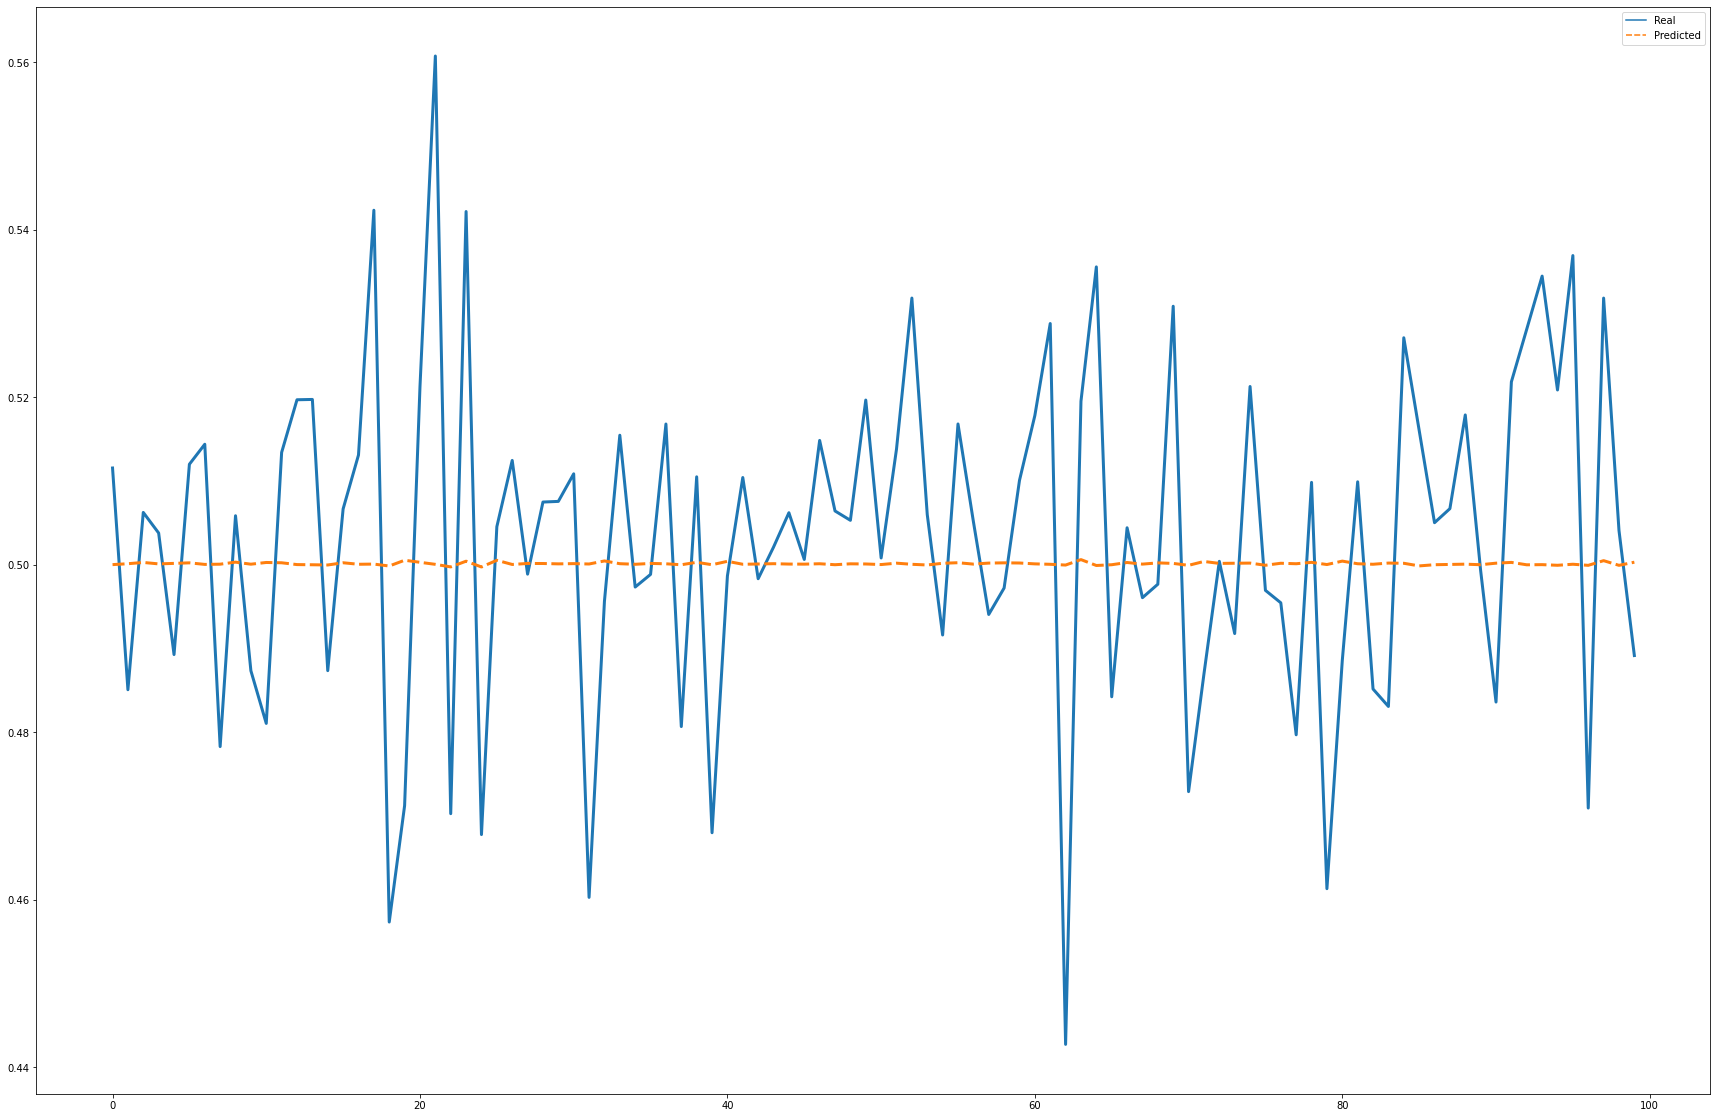

In [67]:
#graph1D(y_test,test_predict,100)